In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('./eolica.csv')
df.head()

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Producción,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
1,Importación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
2,Variación de inventarios,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
3,Oferta total,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
4,Exportación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000


In [ ]:
df = df.rename(columns= {'Unnamed: 0': 'Campos'})
df.head()

,Campos,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Producción,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
1,Importación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
2,Variación de inventarios,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
3,Oferta total,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
4,Exportación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000


In [ ]:
def proccess_null(cell):
    if cell == 'N/D':
        return 0
    return cell

df = df.applymap(proccess_null)
df[['2000', '2001']].astype('float')
df.dtypes

Campos     object
2000       object
2001       object
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
2021      float64
2022      float64
dtype: object

In [ ]:
new_index = list(df['Campos'])
map_index = { i: new_index[i] for i in range(len(new_index)) }
df = df.rename(index=map_index)
df = df.drop('Campos', axis=1)
df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Producción,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,2.14687,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
Importación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
Variación de inventarios,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000
Oferta total,0.001705,0.001705,0.000464,0.018,0.0216,0.018,0.162,0.8928,0.918,2.14687,...,15.064358,23.134308,31.482341,37.361141,38.231214,47.119,60.216,70.928131,166.046,180.542847
Exportación,0,0,0.000000,0.000,0.0000,0.000,0.000,0.0000,0.000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000


In [ ]:
transposed_df = df.transpose()
transposed_df = transposed_df[transposed_df.columns].astype(float)
transposed_df.head()

,Producción,Importación,Variación de inventarios,Oferta total,Exportación,No aprovechada,Maquila - intercambio neto,Oferta interna bruta,Total transformación,Coquizadoras,Refinerías y despuntadoras,Plantas de gas y fraccionadoras,Centrales eléctricas públicas,Centrales eléctricas PIE,Consumo propio del sector,Diferencia estadística
2000,0.001705,0.0,0.0,0.001705,0.0,0.0,0.0,0.001705,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,-0.001705
2001,0.001705,0.0,0.0,0.001705,0.0,0.0,0.0,0.001705,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,-0.001705
2002,0.000464,0.0,0.0,0.000464,0.0,0.0,0.0,0.000464,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,-0.000464
2003,0.018000,0.0,0.0,0.018000,0.0,0.0,0.0,0.018000,-0.0180,0.0,0.0,0.0,-0.0180,0.0,0.0,0.000000
2004,0.021600,0.0,0.0,0.021600,0.0,0.0,0.0,0.021600,-0.0216,0.0,0.0,0.0,-0.0216,0.0,0.0,0.000000


In [ ]:
transposed_df[transposed_df.columns[8:]].describe()

,Total transformación,Coquizadoras,Refinerías y despuntadoras,Plantas de gas y fraccionadoras,Centrales eléctricas públicas,Centrales eléctricas PIE,Consumo propio del sector,Diferencia estadística
count,23.000000,23.0,23.0,23.0,23.000000,23.0,23.0,23.000000
mean,-0.441856,0.0,0.0,0.0,-0.441856,0.0,0.0,-29.905064
std,0.334311,0.0,0.0,0.0,0.334311,0.0,0.0,49.779073
min,-0.918000,0.0,0.0,0.0,-0.918000,0.0,0.0,-179.856256
25%,-0.708560,0.0,0.0,0.0,-0.708560,0.0,0.0,-37.270893
50%,-0.438000,0.0,0.0,0.0,-0.438000,0.0,0.0,-5.553506
75%,-0.091800,0.0,0.0,0.0,-0.091800,0.0,0.0,-0.000232
max,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [ ]:
def proccess_negatives(cell):
    if cell < 0:
        return abs(cell)
    return cell

transposed_df = transposed_df.applymap(proccess_negatives)

In [ ]:
transposed_df.describe()

,Producción,Importación,Variación de inventarios,Oferta total,Exportación,No aprovechada,Maquila - intercambio neto,Oferta interna bruta,Total transformación,Coquizadoras,Refinerías y despuntadoras,Plantas de gas y fraccionadoras,Centrales eléctricas públicas,Centrales eléctricas PIE,Consumo propio del sector,Diferencia estadística
count,23.000000,23.0,23.0,23.000000,23.0,23.0,23.0,23.000000,23.000000,23.0,23.0,23.0,23.000000,23.0,23.0,23.000000
mean,30.346920,0.0,0.0,30.346920,0.0,0.0,0.0,30.346920,0.441856,0.0,0.0,0.0,0.441856,0.0,0.0,29.905064
std,49.868410,0.0,0.0,49.868410,0.0,0.0,0.0,49.868410,0.334311,0.0,0.0,0.0,0.334311,0.0,0.0,49.779073
min,0.000464,0.0,0.0,0.000464,0.0,0.0,0.0,0.000464,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,0.091800,0.0,0.0,0.091800,0.0,0.0,0.0,0.091800,0.091800,0.0,0.0,0.0,0.091800,0.0,0.0,0.000232
50%,5.933957,0.0,0.0,5.933957,0.0,0.0,0.0,5.933957,0.438000,0.0,0.0,0.0,0.438000,0.0,0.0,5.553506
75%,37.796177,0.0,0.0,37.796177,0.0,0.0,0.0,37.796177,0.708560,0.0,0.0,0.0,0.708560,0.0,0.0,37.270893
max,180.542847,0.0,0.0,180.542847,0.0,0.0,0.0,180.542847,0.918000,0.0,0.0,0.0,0.918000,0.0,0.0,179.856256


In [ ]:
transposed_df.columns

Index(['Producción', 'Importación', 'Variación de inventarios', 'Oferta total',
       'Exportación', 'No aprovechada', 'Maquila - intercambio neto',
       'Oferta interna bruta', 'Total transformación', 'Coquizadoras',
       'Refinerías y despuntadoras', 'Plantas de gas y fraccionadoras',
       'Centrales eléctricas públicas', 'Centrales eléctricas PIE',
       'Consumo propio del sector', 'Diferencia estadística'],
      dtype='object')

In [ ]:
df_nz = transposed_df[['Producción', 'Oferta total', 'Oferta interna bruta', 'Total transformación', 'Centrales eléctricas públicas', 'Diferencia estadística']]

<Axes: >

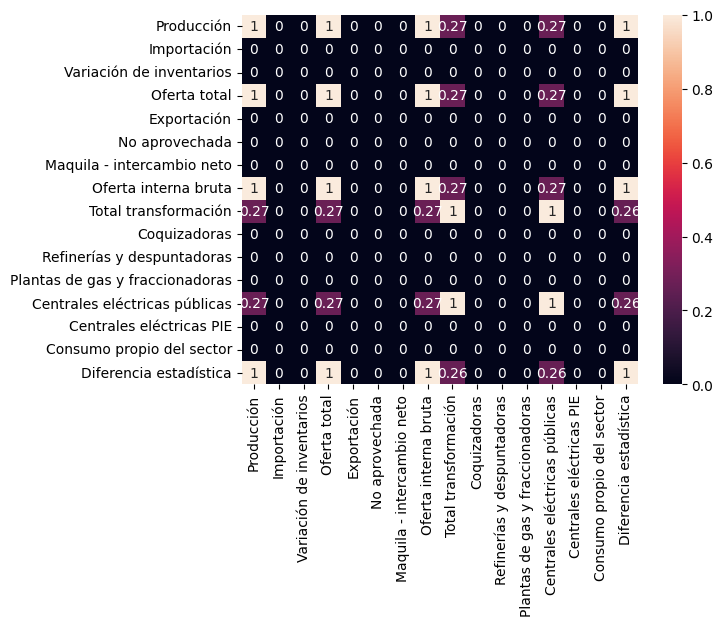

In [ ]:
sns.heatmap(transposed_df.corr().fillna(0), annot = True)

<Axes: >

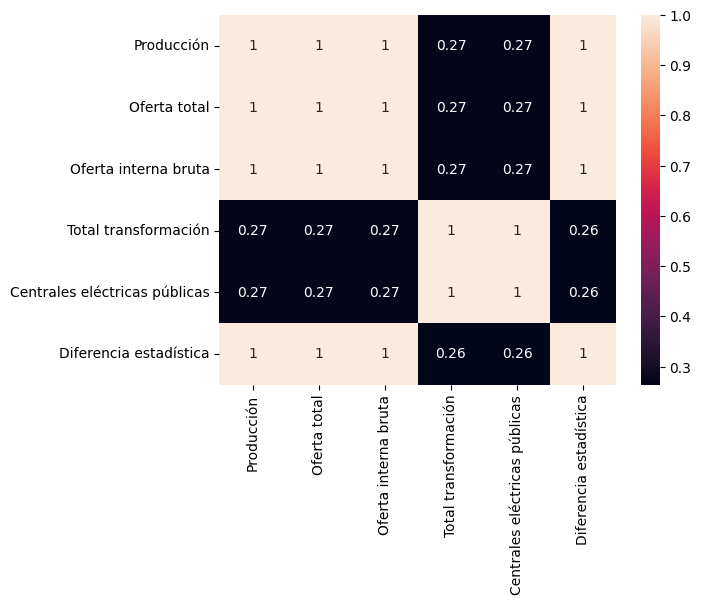

In [ ]:
sns.heatmap(df_nz.corr(), annot = True)

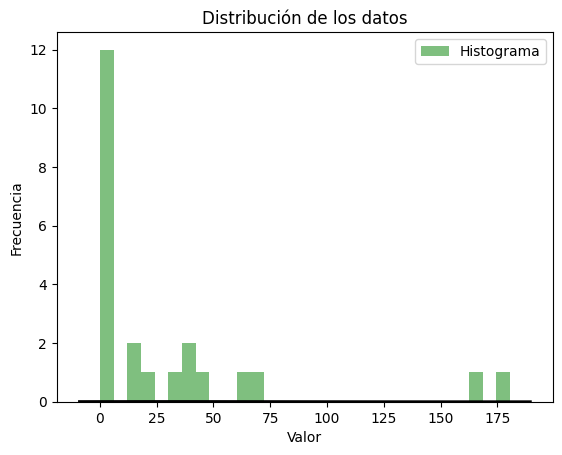

In [ ]:
from scipy.stats import norm
plt.hist(df_nz['Producción'], bins=30, alpha=0.5, color='g', label='Histograma')
mu, std = norm.fit(df_nz['Producción'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribución de los datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

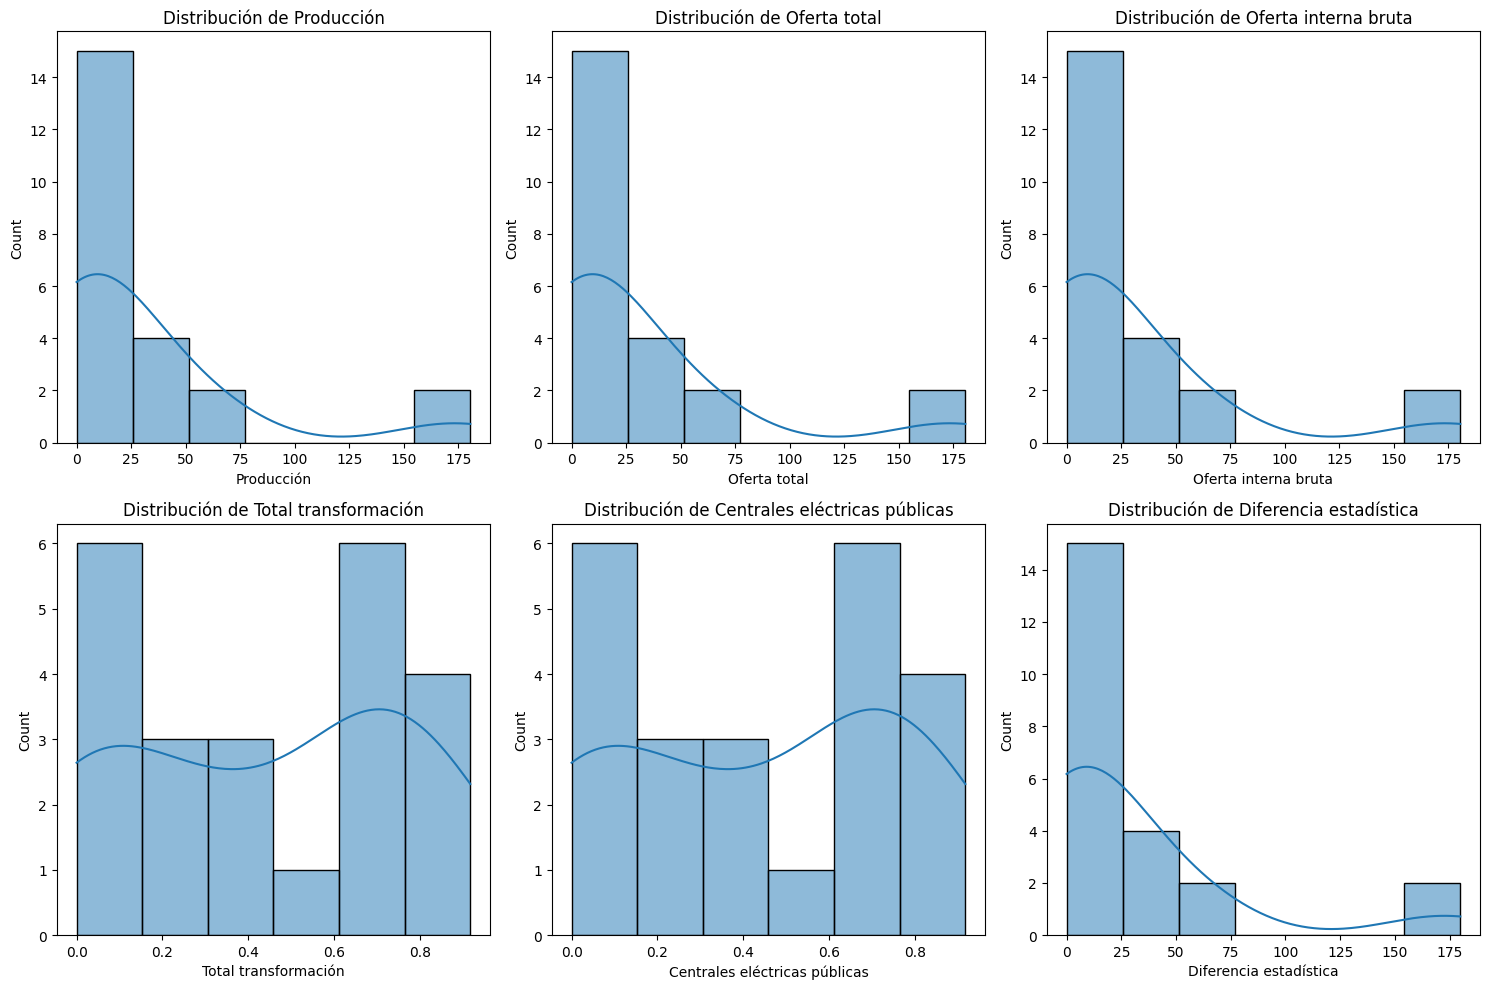

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    sns.histplot(df_nz[df_nz.columns[i]], kde=True, ax=ax)
    ax.set_title(f'Distribución de {df_nz.columns[i]}')

plt.tight_layout()
plt.show()

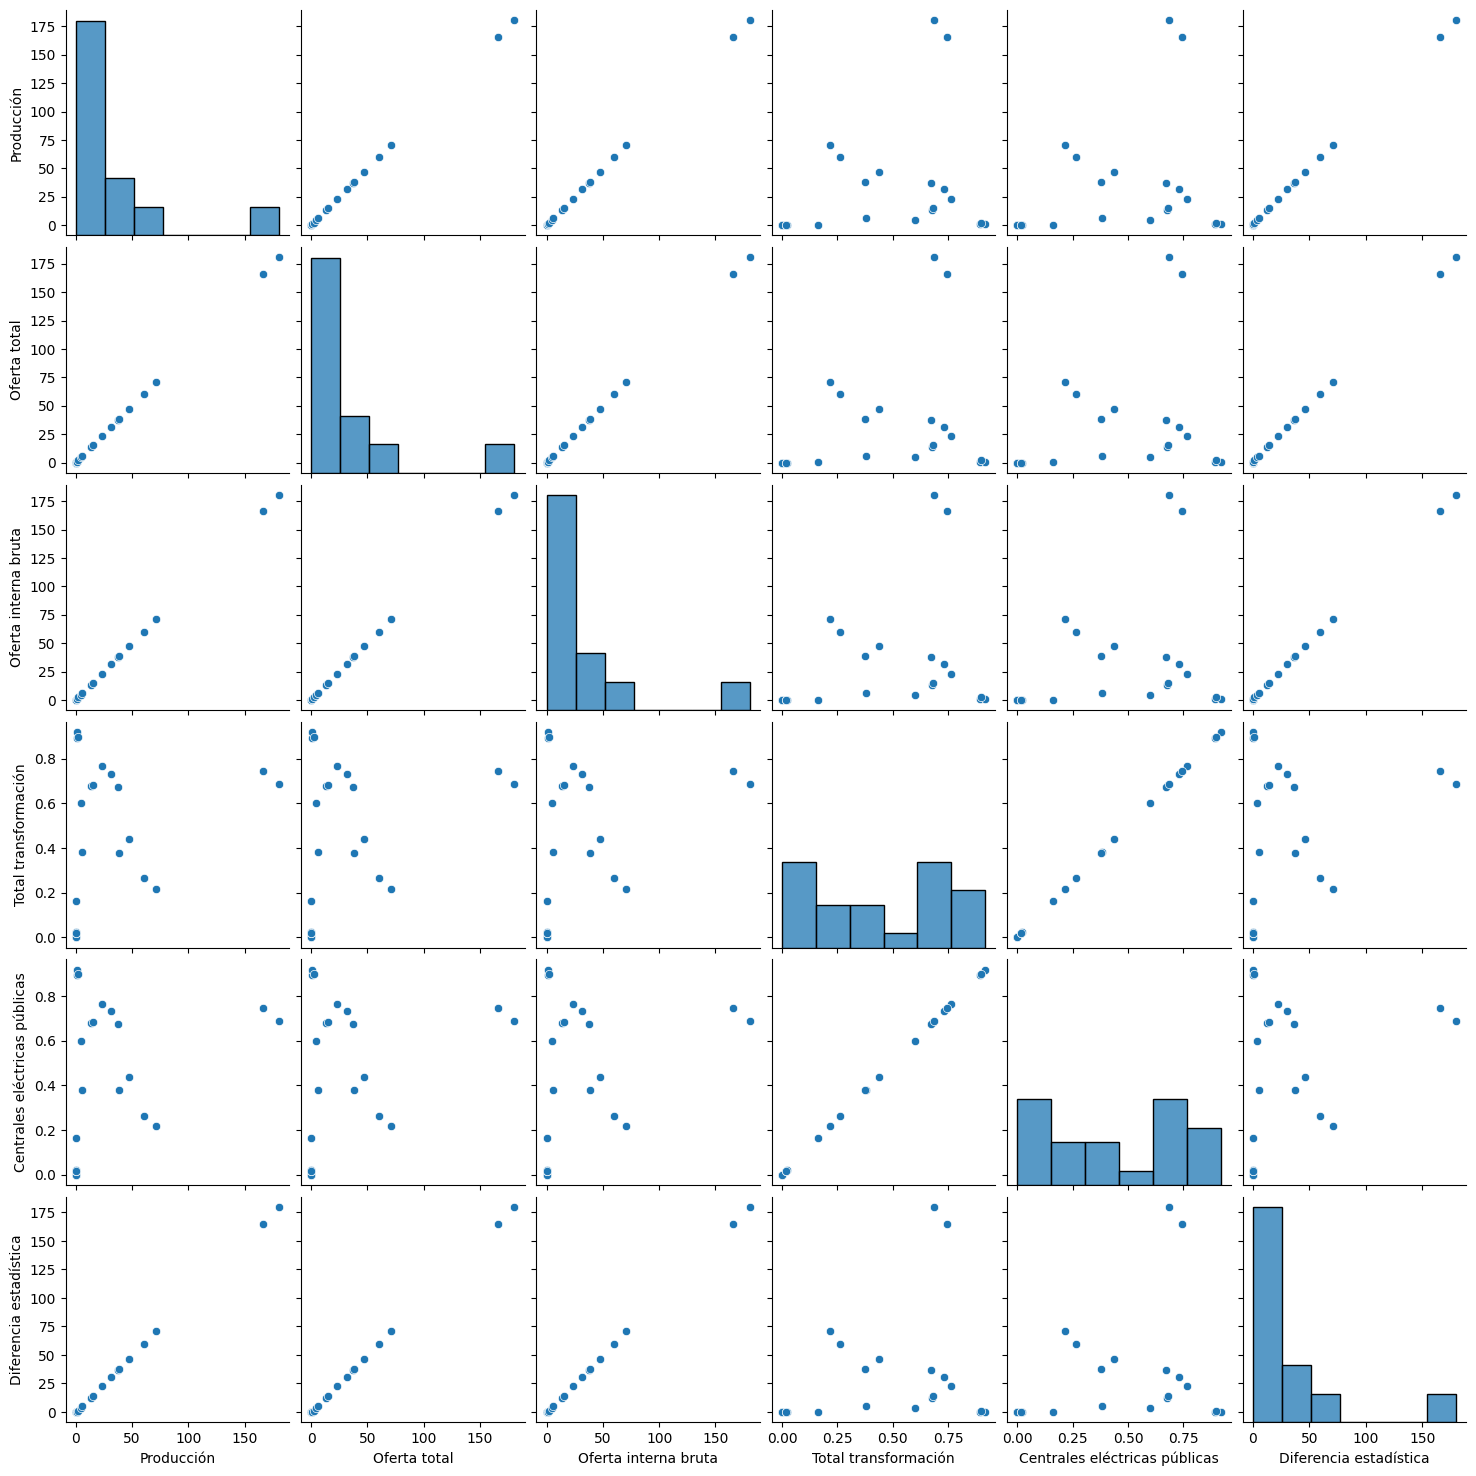

In [ ]:
sns.pairplot(df_nz)

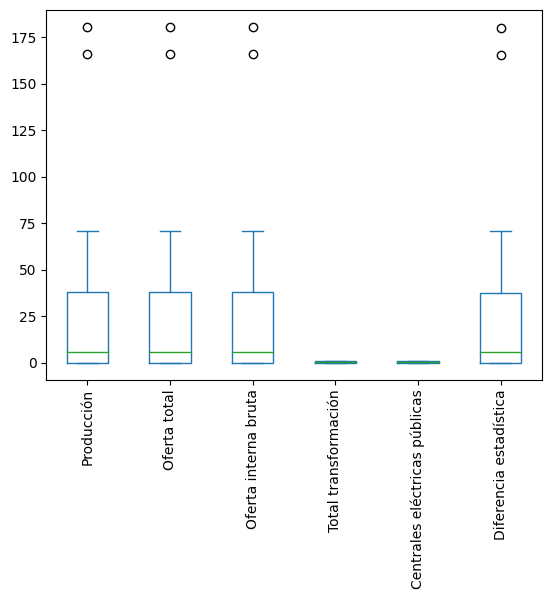

In [ ]:
ax = df_nz.plot.box()
plt.xticks(rotation=90)
plt.show()

In [ ]:
Q1 = df_nz.quantile(0.25)
Q3 = df_nz.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_out = df_nz[~((df_nz < lower_bound) | (df_nz > upper_bound)).any(axis=1)]

df_out = df_out.fillna(df.median())

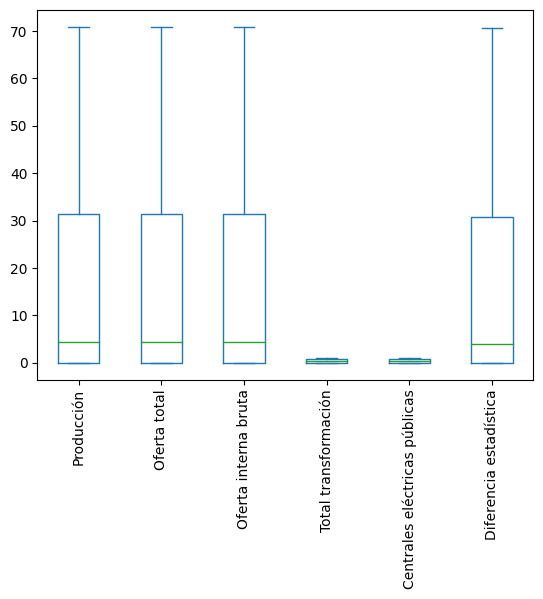

In [ ]:
ax = df_out.plot.box()
plt.xticks(rotation=90)
plt.show()

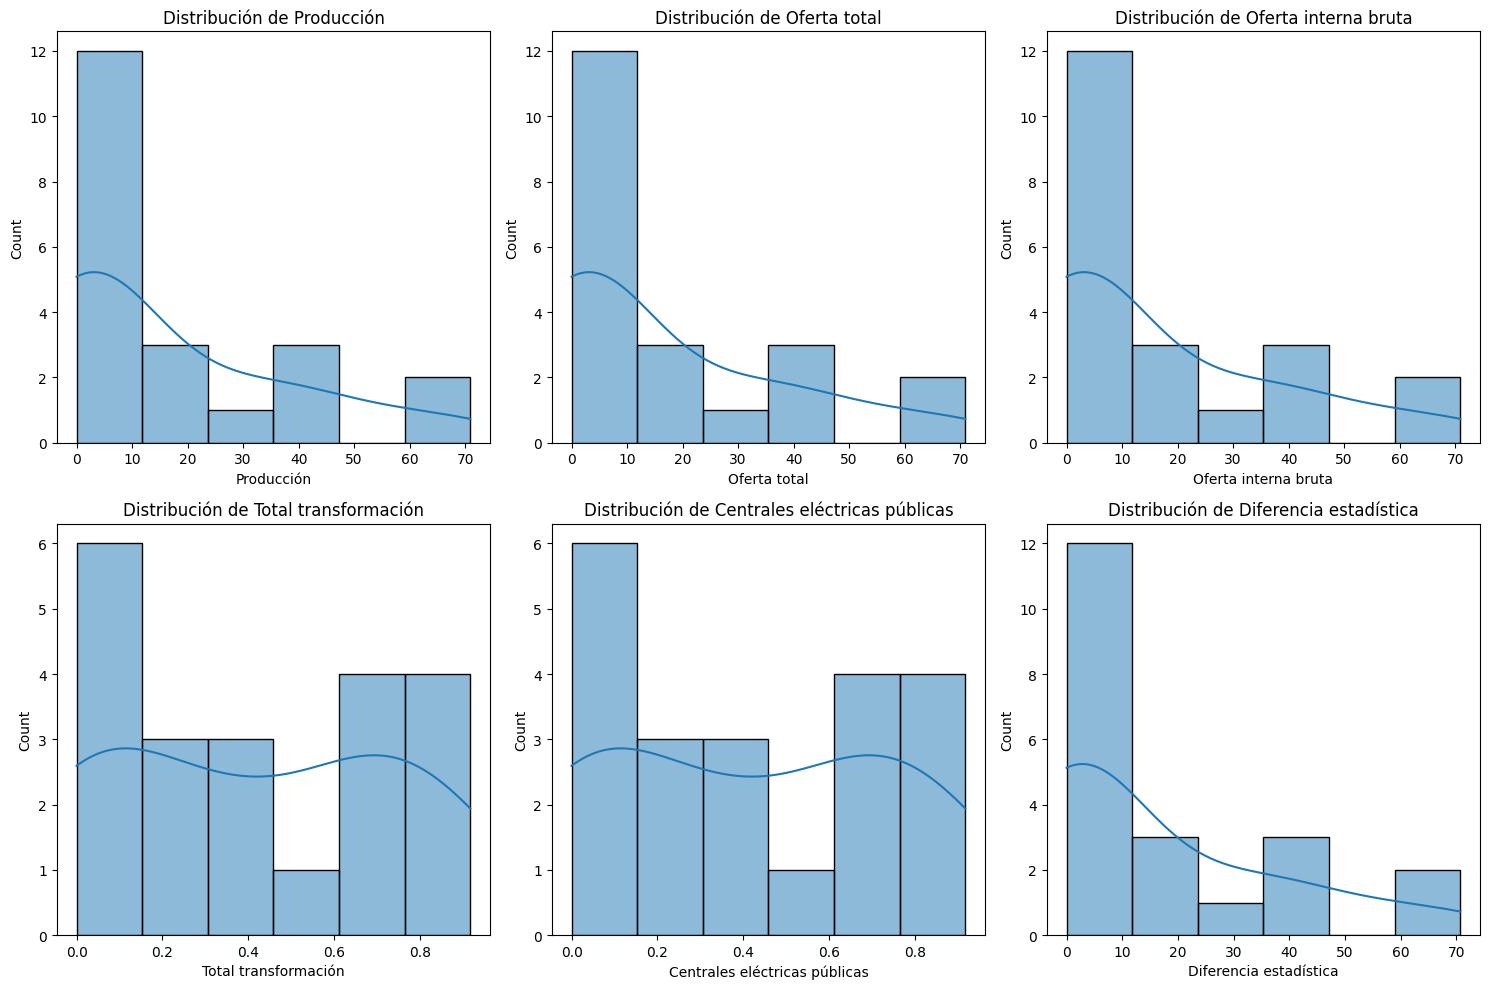

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    sns.histplot(df_out[df_out.columns[i]], kde=True, ax=ax)
    ax.set_title(f'Distribución de {df_out.columns[i]}')

plt.tight_layout()
plt.show()

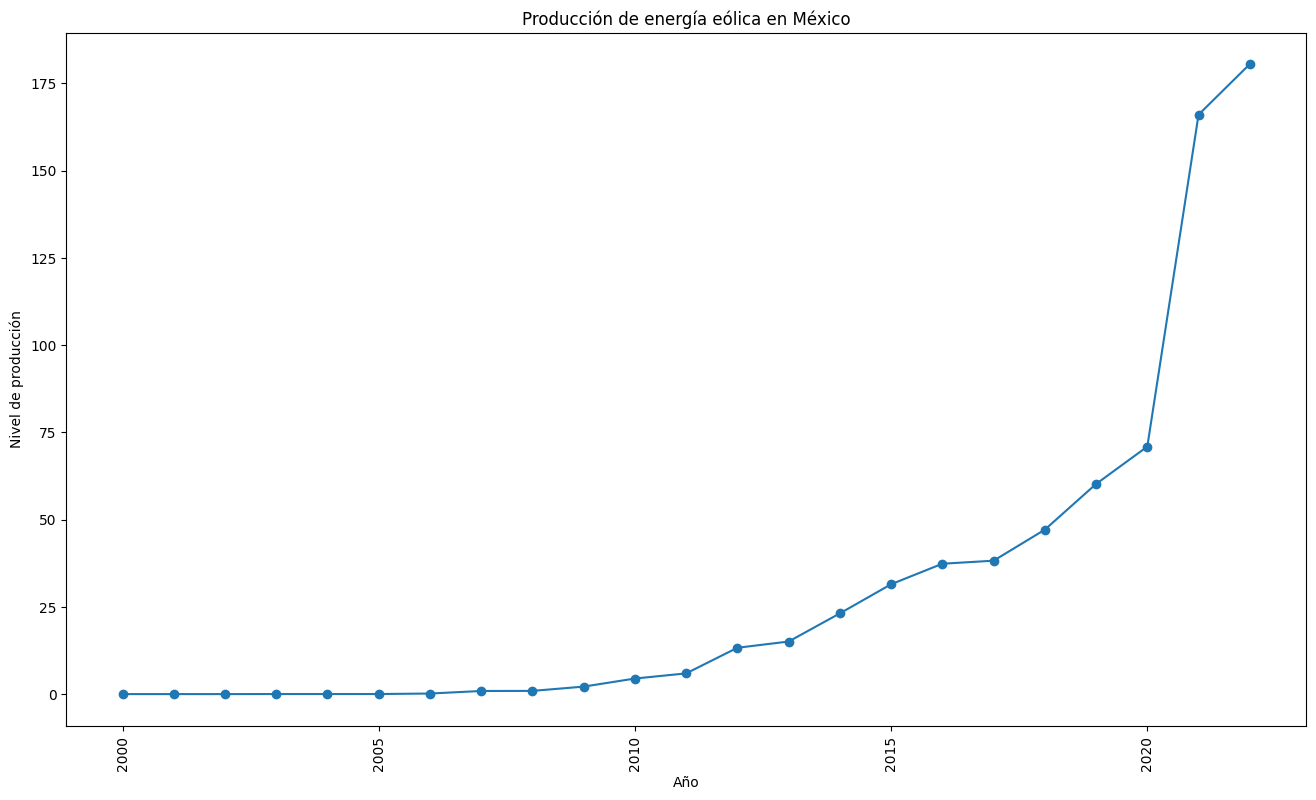

In [ ]:
prod = df_nz['Producción']
years = [i for i in range(2000, 2023)]

plt.figure(figsize=(16, 9))
plt.plot(years, prod, marker='o')
plt.title('Producción de energía eólica en México')
plt.ylabel('Nivel de producción')
plt.xlabel('Año')
plt.xticks(rotation=90)
plt.show()

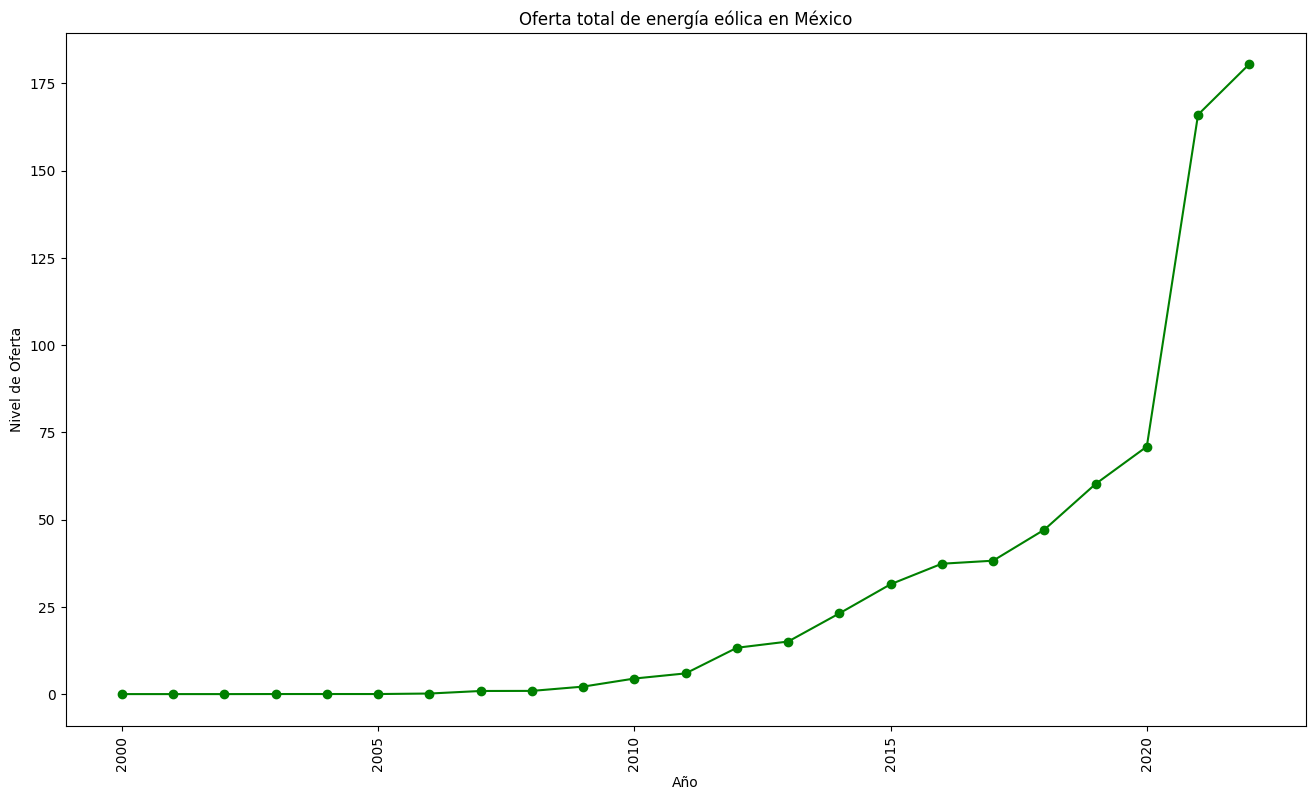

In [ ]:
prod = df_nz['Oferta total']
years = [i for i in range(2000, 2023)]

plt.figure(figsize=(16, 9))
plt.plot(years, prod, marker='o', color='green')
plt.title('Oferta total de energía eólica en México')
plt.ylabel('Nivel de Oferta')
plt.xlabel('Año')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df3 = pd.read_csv('./comercio_internacional.csv')

In [ ]:
flow_sales = df3[df3['Flow'] == 'Compras internacionales']

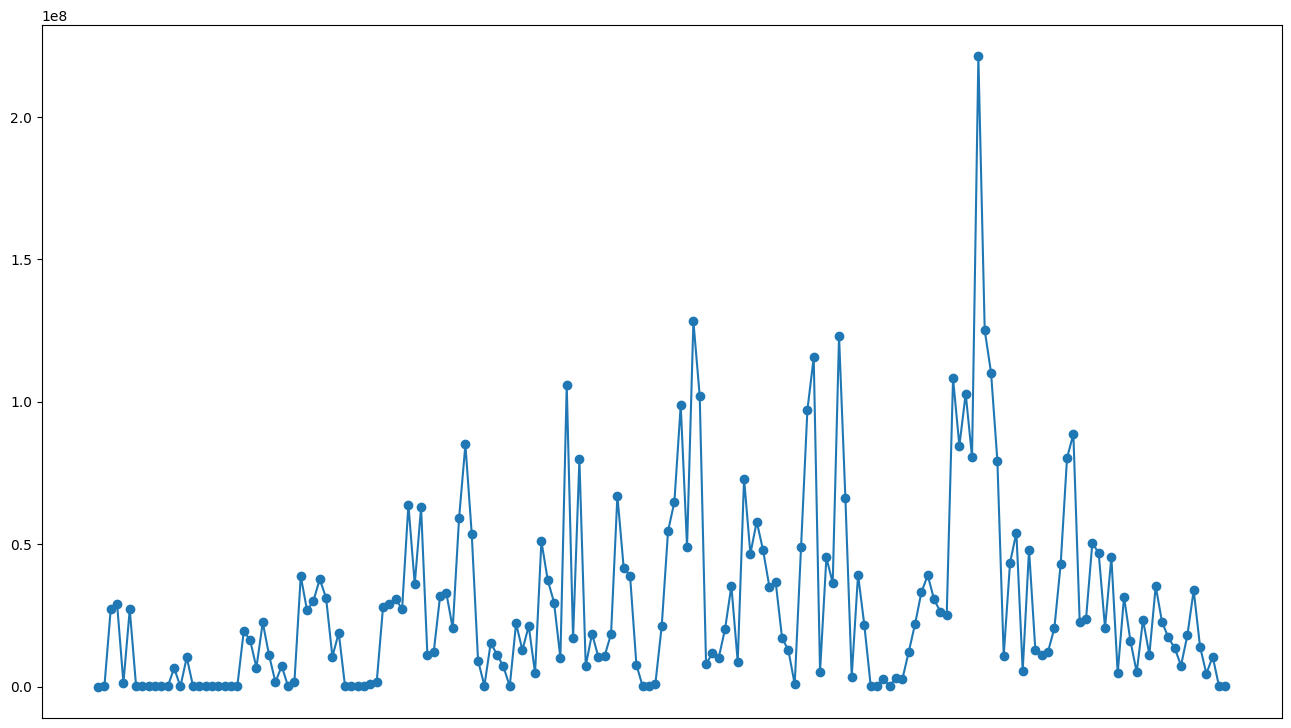

In [ ]:
x_month = flow_sales['Month']
y_trade = flow_sales['Trade Value']
plt.figure(figsize=(16, 9))
plt.plot(x_month, y_trade, marker='o')
plt.xticks([])
plt.show()

In [ ]:
df_out.shape

(21, 6)

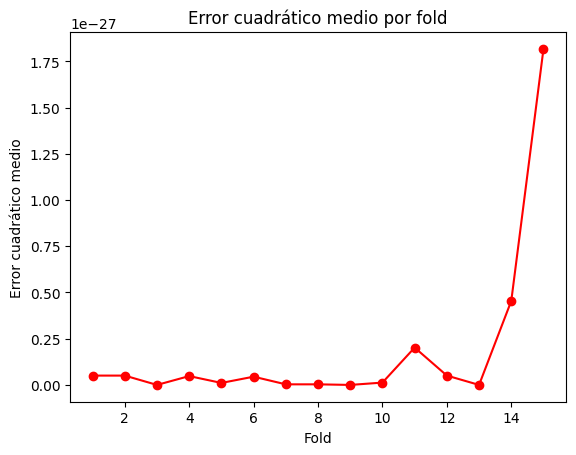

In [ ]:
from sklearn.model_selection import KFold

X = df_out[['Oferta total', 'Oferta interna bruta']].values
y = df_out['Producción'].values


kf = KFold(n_splits=15)

model = LinearRegression()

mse_list_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list_test.append(mse)

plt.plot(range(1, len(mse_list_test)+1), mse_list_test, marker='o', color='red')
plt.title('Error cuadrático medio por fold')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()

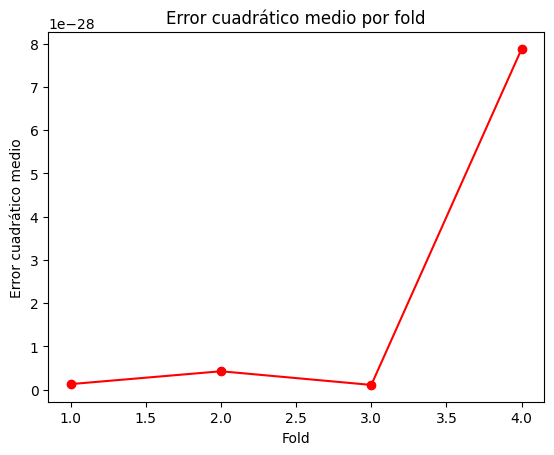

In [ ]:
from sklearn.model_selection import KFold

X = df_out[['Oferta total', 'Oferta interna bruta']].values
y = df_out['Producción'].values


kf = KFold(n_splits=4)

model = LinearRegression()

mse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

plt.plot(range(1, len(mse_list)+1), mse_list, marker='o', color='red')
plt.title('Error cuadrático medio por fold')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()

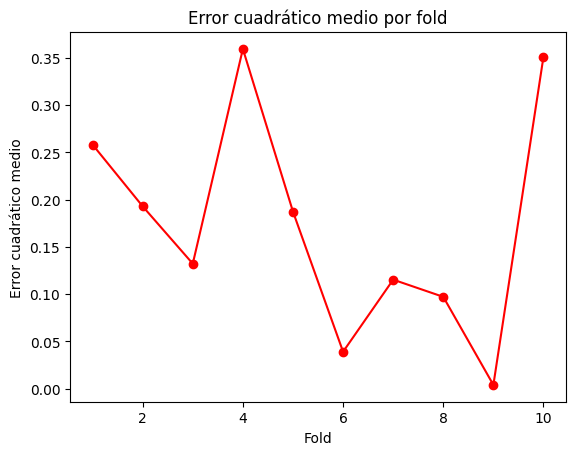

In [ ]:
from sklearn.model_selection import KFold

X = df_out[['Producción', 'Oferta interna bruta']].values
y = df_out['Centrales eléctricas públicas'].values


kf = KFold(n_splits=10)

model = LinearRegression()

mse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

plt.plot(range(1, len(mse_list)+1), mse_list, marker='o', color='red')
plt.title('Error cuadrático medio por fold')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()

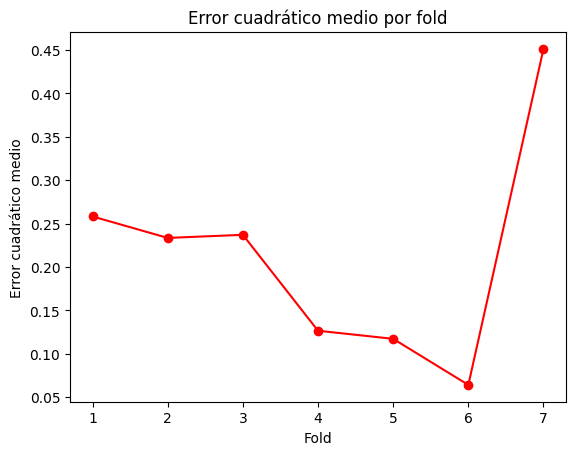

In [ ]:
from sklearn.model_selection import KFold

X = df_out[['Producción', 'Oferta interna bruta']].values
y = df_out['Centrales eléctricas públicas'].values


kf = KFold(n_splits=7)

model = LinearRegression()

mse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

plt.plot(range(1, len(mse_list)+1), mse_list, marker='o', color='red')
plt.title('Error cuadrático medio por fold')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 r

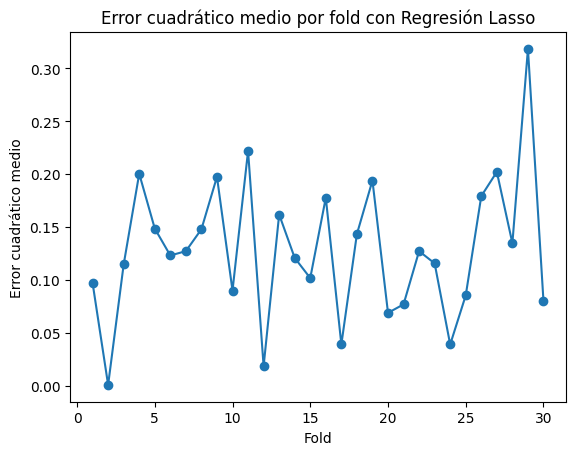

Valor alfa óptimo: 0.99


In [ ]:
X = df_out[['Producción', 'Oferta interna bruta']]
y = df_out['Centrales eléctricas públicas']

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)
mse_list = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o')
plt.title('Error cuadrático medio por fold con Regresión Lasso')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()
print('Valor alfa óptimo:', model.alpha_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 r

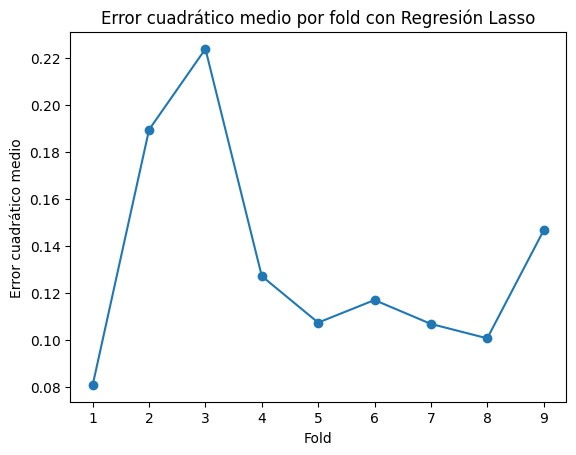

Valor alfa óptimo: 0.99


In [ ]:
X = df_out[['Producción', 'Oferta interna bruta']]
y = df_out['Centrales eléctricas públicas']

cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)
mse_list = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)

plt.plot(range(1, len(mse_list) + 1), mse_list, marker = 'o')
plt.title('Error cuadrático medio por fold con Regresión Lasso')
plt.xlabel('Fold')
plt.ylabel('Error cuadrático medio')
plt.show()
print('Valor alfa óptimo:', model.alpha_)

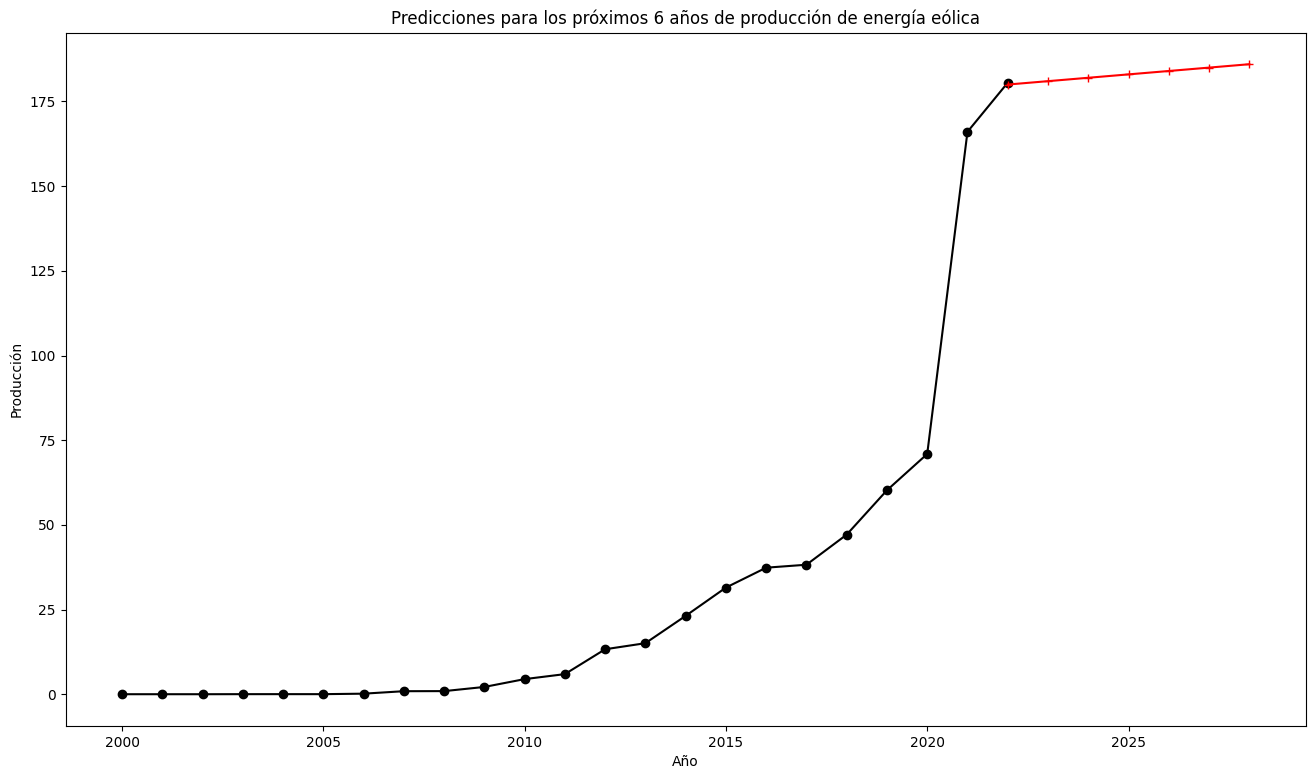

In [ ]:
X = df_nz['Producción'].values.reshape(-1,1)
y = df_nz['Producción'].values

model = LinearRegression()
model.fit(X, y)

years_to_predict = np.array(range(int(X[-1]), int(X[-1]) + 7)).reshape(-1,1)
predictions = model.predict(years_to_predict)
fy = [i for i in range(2000, 2023)]
ly = [i for i in range(2022, 2029)]

plt.figure(figsize=(16,9))
plt.plot(fy, y, color='black', marker='o')
plt.plot(ly, predictions, color='red', marker='+')
plt.title('Predicciones para los próximos 6 años de producción de energía eólica')
plt.xlabel('Año')
plt.ylabel('Producción')
plt.show()

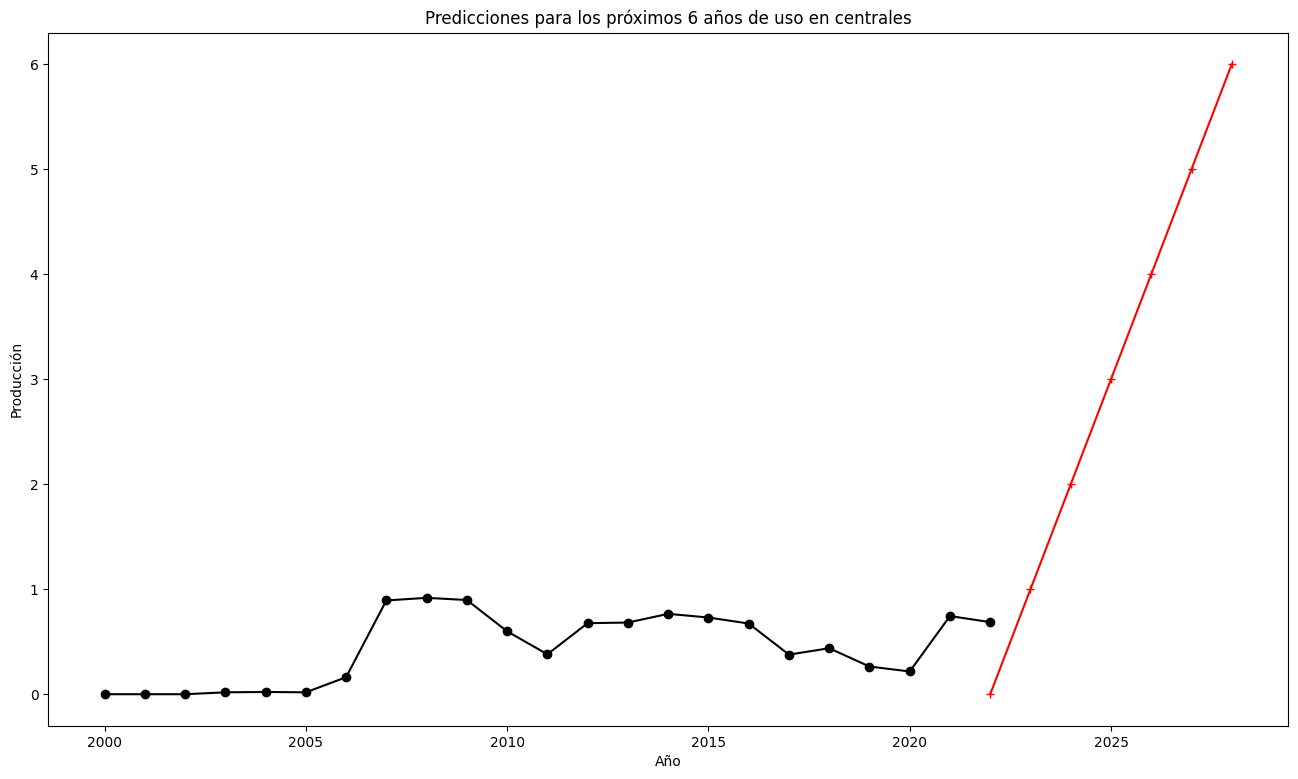

In [ ]:
X = df_nz['Centrales eléctricas públicas'].values.reshape(-1,1)
y = df_nz['Centrales eléctricas públicas'].values

model = LinearRegression()
model.fit(X, y)

years_to_predict = np.array(range(int(X[-1]), int(X[-1]) + 7)).reshape(-1,1)
predictions = model.predict(years_to_predict)
fy = [i for i in range(2000, 2023)]
ly = [i for i in range(2022, 2029)]

plt.figure(figsize=(16,9))
plt.plot(fy, y, color='black', marker='o')
plt.plot(ly, predictions, color='red', marker='+')
plt.title('Predicciones para los próximos 6 años de uso en centrales')
plt.xlabel('Año')
plt.ylabel('Producción')
plt.show()